# Heat Advection in the Gulf Stream

#### Overview:
In this notebook, we will examine the advection of heat in the Gulf Stream.

#### Import modules
Begin by importing modules to conduct calculations and make plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Read in the Data
For this example, a subset of model data is provided for the west coast of the United States. Begin by reading in this data below:

In [2]:
ds = xr.open_dataset('ADVn_TH.nc') # Temperature and speed of temp moving
depth = np.array(ds['depth'][:])
longitude = np.array(ds['longitude'][:,:])
latitude = np.array(ds['latitude'][:,:])
ADVn_TH = np.array(ds['ADVn_TH'][:, :, :]) #depth, lat, and lon
ds.close()

With a look forward to the plots we'll make next, determine the minimum and maximum of the data set:

In [3]:
print('Min: ',np.min(ADVn_TH[0, :, :]),'\u00B0C m\u00B3/s')
print('Max: ',np.max(ADVn_TH[0, :, :]),'\u00B0C m\u00B3/s')

Min:  -3360294.5 °C m³/s
Max:  7188987.5 °C m³/s


## Plot the Data
To get a feel for this data, make two plots. For both plots, be sure to use a **divergent colorbar** and make the minimum and maximum color bounds the same.

### Plot 1: Surface Heat Advection
Create a plot showing the surface advection field. In addition, draw a line from -87.8$^{\circ}E$ to -61.5$^{\circ}E$ longitude at a latitude of 33.4$^{\circ}$N. This corresponds to row 70 and columns 120 to 200 in the data set, defined here:

In [4]:
# row and cols for the plotting line
row = 70
cols = np.arange(120,200)

Make your plot here:

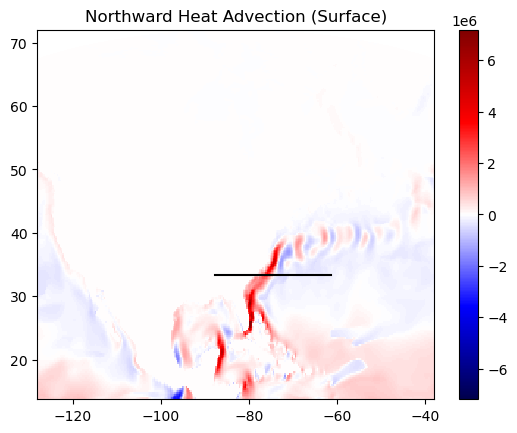

In [12]:
# make a figure object and axes
# use cartopy if you're feeling fancy
plt.figure()

# plot the advection field
C = plt.pcolormesh(longitude, latitude, ADVn_TH[0,:, :], cmap = 'seismic', vmin = -7188987.5, vmax = 7188987.5) #use divergent if numbers going left and right
plt.colorbar(C)

# plot a  line at the rows and columns indicated
lon_subset = longitude [ row, cols]
lat_subset = latitude [ row, cols]
plt.plot( lon_subset, lat_subset, '-k')

# format the axes
plt.title('Northward Heat Advection (Surface)')
plt.show()

### Plot 2: Advection Cross-Section
Plot a cross-section of the advection field along the line indicated above (using the given rows and columns). The $x$-axis should display longitude and the $y$-axis should display depth.

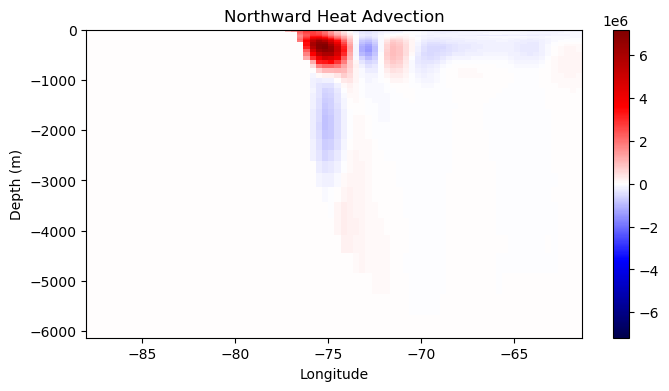

In [17]:
# make a figure object
plt.figure(figsize=(8,4))

# plot the data here
ADVn_TH_subset = ADVn_TH[:, row, cols]
C = plt.pcolormesh (lon_subset, depth, ADVn_TH_subset, cmap='seismic', vmin = -7188987.5, vmax = 7188987.5)
# format the axes
plt.colorbar(C)
plt.ylabel('Depth (m)')
plt.xlabel('Longitude')
plt.title('Northward Heat Advection')
plt.show()

## Compute Total Northward Heat Transport
Next, let's consider how much heat is advected toward the polar regions from the tropics by the Gulf Stream. First, consider the total "temperature advection" as given by the data set. In other words, sum all of the cells in the cross-section defined above:

In [19]:
# comput the sum and print it
temperature_advection_total = np.sum(ADVn_TH_subset) # C m^3/s
print(temperature_advection_total)

430210800.0


##### Convert to Watts
"Temperature advection" is a bit of an odd unit. A more conventional unit is Watts - the total Joules per second that pass through a given cross-section. To convert to Watts, we'll need to consider the *heat capacity* and the *density* of sea water:

$$
\begin{align*}
C_p &= 3850 \text{ J kg}^{-1}\, \,^{\circ}\text{ C}^{-1}\\
\rho_w &= 1025 \text{ kg m}^{-3}
\end{align*}
$$

In [21]:
Cp = 3850 # J / (kg C)
rho = 1025 # kg / m3

Using a dimensional analysis approach, compute the total watts of northward heat transport through the Gulf Stream.

In [23]:
# W = 1  J  =  J     *    kg   *   Cm^3    =   J
#        s    kg*C       m^3        s          s
Watts = Cp * rho * temperature_advection_total
print(Watts)

1697719432640000.0


This number can be printed in scientific notation with the following syntax: `"{:.2E}".format(W)`

In [24]:
"{:.2E}".format(Watts)

'1.70E+15'

#### Putting it in context
It's hard to imagine what 10$^{15}$ W (a.k.a. a Petawatt, PW) really is. To put this in context, let's consider how it stacks up to the total flux of energy absorbed by the Earth. On each meter squared of Earth, the per-unit energy flux is:

In [28]:
S = 340 # W / m^2

Using the above value, compute the total amount of watts absorbed by the surface of the Earth. The radius of Earth is 6371 km.

In [30]:
Surface = 4 * np.pi * (6371 * 1000) ** 2
Total_energy_earth = Surface * S
print(Total_energy_earth) 

1.73421920449328e+17


What percentage of Earth's absorbed energy is funneled through the Gulf Stream?

In [31]:
percent = Watts / Total_energy_earth * 100
print(percent)

0.9789531959058515


That might not seem like a lot, but consider that the Gulf Stream makes up a tiny fraction of the ocean, not to mention the land masses and atmosphere!